In [1]:
from translation import BasicBenchmarkTranslator, SequenceGAEncoder, FJSSPInstancesTranslator
from model import ProductionEnvironment, Order
from oo_sequence_ga import GA, Individual
from visualization import visualize_schedule, visualizer_for_schedule

In [2]:
source = '5_Kacem'
benchmark_id = 2
simple_translator = FJSSPInstancesTranslator()
production_environment = simple_translator.translate(source=source, benchmark_id=benchmark_id)

In [3]:
orders : list[Order] = []
for i in range(len(production_environment.resources.values())): # should be the same amount as recipes for now
    orders.append(Order(delivery_time=1000, latest_acceptable_time=1000, resources=[(production_environment.get_resource(i), 1)], penalty=100.0, tardiness_fee=50.0, divisible=False, profit=500.0))

encoder = SequenceGAEncoder()
production_environment.orders = orders
workstations_per_operation, base_durations, job_operations = encoder.encode(production_environment, orders)

solver = GA(job_operations, workstations_per_operation, base_durations) # isn't actually needed, just for the api
#solver.initialize(nb_jobs, nb_operations, nb_machines, job_ops_machs, durations, job_op_suitable, upper_bound)

In [4]:
sequence = [0, 4, 6, 7, 9, 8, 5, 4, 2, 3, 3, 6, 4, 9, 0, 2, 8, 7, 5, 0, 5, 6, 1, 1, 9, 2, 3, 8, 7]

In [5]:
workstations = [0, 5, 5, 6, 0, 1, 3, 3, 0, 3, 5, 1, 6, 3, 2, 6, 2, 3, 2, 0, 6, 6, 5, 4, 3, 1, 5, 6, 1]

In [6]:
durations = []
for i in range(len(workstations)):
    durations.append(base_durations[i][workstations[i]])

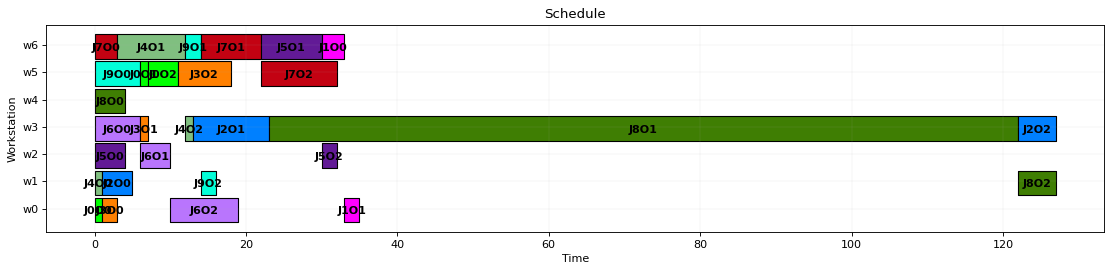

In [7]:
schedule = SequenceGAEncoder().decode(sequence, workstations, None, durations, job_operations, production_environment, True, None)
visualizer_for_schedule(schedule, job_operations)